# Advanced Applied Math II (Intensive course in Kobe Univ., Aug. 2021)
### Instructor: Xiao-Nan Lu (Univ. Yamanashi)

In this course we use Python (Python 3 or later version) for programming demos.

For beginners, Jupyter Notebook (within Anaconda) is recommeded.

# Day1: Latin Squares & Orthogonal Arrays

## Example: a groupoid of order $n$

In [1]:
import random
import numpy as np

n = 5
li_groupoid = random.choices(range(1, n+1), k=n*n)
groupoid = np.array(li_groupoid).reshape((n, n))
print(groupoid)

[[2 3 1 4 5]
 [1 1 5 5 5]
 [1 1 5 4 4]
 [1 5 3 3 1]
 [4 2 5 1 5]]


## Example: a Latin square (quasigroup) of order $n$
Here, the indexes and symbols are in $\mathbb{Z}_n = \{0,1, \ldots, n-1\}$, and the Latin square is the **Cayley table** of $\mathbb{Z}_n$.

This is also a **loop**, where $0$ is the indentity.

In [2]:
n = 10
li_ls = [ [ (i + j) % n for j in range(n) ] for i in range(n) ]
ls1 = np.array(li_ls)
print(ls1)

[[0 1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9 0]
 [2 3 4 5 6 7 8 9 0 1]
 [3 4 5 6 7 8 9 0 1 2]
 [4 5 6 7 8 9 0 1 2 3]
 [5 6 7 8 9 0 1 2 3 4]
 [6 7 8 9 0 1 2 3 4 5]
 [7 8 9 0 1 2 3 4 5 6]
 [8 9 0 1 2 3 4 5 6 7]
 [9 0 1 2 3 4 5 6 7 8]]


## Example: a multiplicative cyclic of order $p-1$, where $p$ is a prime

In [3]:
p = 11 # p is a prime
g = 2   # generator
cyc_gp = [1]
print("g^0 = 1")
for i in range(1, p-1):
    ele = cyc_gp[i-1] * g % p
    cyc_gp.append(ele)
    print("g^%d = %d" % (i, ele))
print("C_%d = " % (p-1), cyc_gp)

g^0 = 1
g^1 = 2
g^2 = 4
g^3 = 8
g^4 = 5
g^5 = 10
g^6 = 9
g^7 = 7
g^8 = 3
g^9 = 6
C_10 =  [1, 2, 4, 8, 5, 10, 9, 7, 3, 6]


The Latin square obtained from $C_{p-1}$ is

In [4]:
n = p-1
li_ls = [ [ cyc_gp[(i + j) % n] for j in range(n) ] for i in range(n) ]
ls2 = np.array(li_ls)
print(ls2)

[[ 1  2  4  8  5 10  9  7  3  6]
 [ 2  4  8  5 10  9  7  3  6  1]
 [ 4  8  5 10  9  7  3  6  1  2]
 [ 8  5 10  9  7  3  6  1  2  4]
 [ 5 10  9  7  3  6  1  2  4  8]
 [10  9  7  3  6  1  2  4  8  5]
 [ 9  7  3  6  1  2  4  8  5 10]
 [ 7  3  6  1  2  4  8  5 10  9]
 [ 3  6  1  2  4  8  5 10  9  7]
 [ 6  1  2  4  8  5 10  9  7  3]]


Replacing symbols in the above Latin square according to the following permutation

In [5]:
print(np.array( [ cyc_gp, range(p-1) ] ))

[[ 1  2  4  8  5 10  9  7  3  6]
 [ 0  1  2  3  4  5  6  7  8  9]]


Then the Latin square after symbol replacement is

In [6]:
ls2_rep = ls2
for i in range(p-1):
    ls2_rep = np.where(ls2 == cyc_gp[i], -i, ls2_rep)
ls2_rep = - ls2_rep
print(ls2_rep)

[[0 1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9 0]
 [2 3 4 5 6 7 8 9 0 1]
 [3 4 5 6 7 8 9 0 1 2]
 [4 5 6 7 8 9 0 1 2 3]
 [5 6 7 8 9 0 1 2 3 4]
 [6 7 8 9 0 1 2 3 4 5]
 [7 8 9 0 1 2 3 4 5 6]
 [8 9 0 1 2 3 4 5 6 7]
 [9 0 1 2 3 4 5 6 7 8]]


which is clearly identical with the Cayley table of $\mathbb{Z}_{p-1}$.

This means the **addtive group** $\mathbb{Z}_{p-1}$ and the **multiplicative group** $C_{p-1}$ are essentially the same (**isomorphism**; 同型). 

## Example: extension (completion) of Latin rectangle

First row of Latin rectangel is  [[2, 4, 1, 3, 0]]
X =  [0, 1, 2, 3, 4]
S_0 =  [0, 1, 3, 4]
S_1 =  [0, 1, 2, 3]
S_2 =  [0, 2, 3, 4]
S_3 =  [0, 1, 2, 4]
S_4 =  [1, 2, 3, 4]


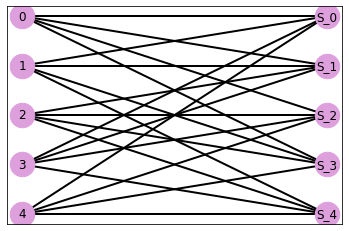

In [7]:
from numpy.random import default_rng
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt 

n = 5
rng = default_rng()
init_row = rng.permutation(n)
LS = [ list(init_row) ]
print("First row of Latin rectangel is ", LS)

li_X = list(range(n))
print("X = ", li_X)
li_Y = []
for i in range(n):
    tmp_li = li_X.copy()
    tmp_li.remove(init_row[i])
    li_Y.append( tmp_li )
    print("S_%d = " % i, tmp_li)
# print(li_Y)

G = nx.Graph()
G.add_nodes_from(li_X, bipartite=0)
G.add_nodes_from(["S_%d" % i  for i in li_X], bipartite=1)
for i in range(n):
    for j in li_Y[i]:
        G.add_edge(j, "S_%d" % i)
        
# position for graph plot
pos = dict()
pos.update( (n, (1, -i)) for i, n in enumerate(li_X) ) # put nodes from li_X at x=1
pos.update( ("S_%d" % i, (2, -i)) for i, n in enumerate(li_X) ) # put nodes from li_Y at x=2
nx.draw_networkx(G, pos, width = 2, node_size=600, node_color="plum")
plt.show()


New row of the Latin rectangle is  [0, 1, 2, 4, 3]


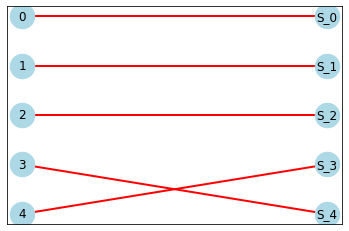

In [8]:
M = bipartite.matching.hopcroft_karp_matching(G, li_X) # M is a dictionary 
new_row = [ M["S_%d" % i] for i in li_X ]
print("New row of the Latin rectangle is ", new_row)
LS.append(new_row) 

# show perfect matching as a graph
G_M = nx.Graph()
G_M.add_nodes_from(M.keys())
for k, v in M.items():
    G_M.add_edge(k,v)
nx.draw_networkx(G_M, pos, width = 2, node_size=600, node_color="lightblue", edge_color="red")
plt.show()


The graph after removing the perfect matching is


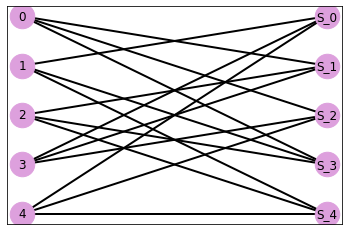

In [9]:
# remove the perfect matching from graph G
for e in G_M.edges():
    G.remove_edge(e[0], e[1])

print("The graph after removing the perfect matching is")
nx.draw_networkx(G, pos, width = 2, node_size=600, node_color="plum")
plt.show()

In [10]:
while G.number_of_edges() > 0:
    M = bipartite.matching.hopcroft_karp_matching(G, li_X) # M is a dictionary 
    new_row = [ M["S_%d" % i] for i in li_X ]
    print("New row of the Latin rectangle is ", new_row)
    LS.append(new_row) 
    #  perfect matching as a graph
    G_M = nx.Graph()
    G_M.add_nodes_from(M.keys())
    for k, v in M.items():
        G_M.add_edge(k,v)
    # remove the perfect matching from graph G
    for e in G_M.edges():
        G.remove_edge(e[0], e[1])

print("Finally, the Latin square is obtained as follows")
print(np.array(LS))
    

New row of the Latin rectangle is  [1, 0, 3, 2, 4]
New row of the Latin rectangle is  [4, 3, 0, 1, 2]
New row of the Latin rectangle is  [3, 2, 4, 0, 1]
Finally, the Latin square is obtained as follows
[[2 4 1 3 0]
 [0 1 2 4 3]
 [1 0 3 2 4]
 [4 3 0 1 2]
 [3 2 4 0 1]]


In [11]:
from datetime import datetime
from pytz import timezone

lastest_time = datetime.now(timezone('Asia/Tokyo'))
print("Last updated at ", lastest_time.strftime('%Y-%m-%d %H:%M:%S'))

Last updated at  2021-08-24 12:03:56
